In [ ]:
# the goal is to predict the Default_On_Payment

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data1 = pd.read_csv('bank.csv')
data1.head()

,Customer_ID,Status_Checking_Acc,Duration_in_Months,Credit_History,Purposre_Credit_Taken,Credit_Amount,Savings_Acc,Years_At_Present_Employment,Inst_Rt_Income,Marital_Status_Gender,...,Age,Other_Inst_Plans,Housing,Num_CC,Job,Dependents,Telephone,Foreign_Worker,Default_On_Payment,Count
0,100001,A11,6,A34,A43,1169,A65,A75,4,A93,...,67,A143,A152,2,A173,1,A192,A201,0,1
1,100002,A12,48,A32,A43,5951,A61,A73,2,A92,...,22,A143,A152,1,A173,1,A191,A201,0,1
2,100003,A14,12,A34,A46,2096,A61,A74,2,A93,...,49,A143,A152,1,A172,2,A191,A201,0,1
3,100004,A11,42,A32,A42,7882,A61,A74,2,A93,...,45,A143,A153,1,A173,2,A191,A201,0,1
4,100005,A11,24,A33,A40,4870,A61,A73,3,A93,...,53,A143,A153,2,A173,2,A191,A201,1,1


In [3]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Customer_ID                  5000 non-null   int64 
 1   Status_Checking_Acc          5000 non-null   object
 2   Duration_in_Months           5000 non-null   int64 
 3   Credit_History               5000 non-null   object
 4   Purposre_Credit_Taken        5000 non-null   object
 5   Credit_Amount                5000 non-null   int64 
 6   Savings_Acc                  5000 non-null   object
 7   Years_At_Present_Employment  5000 non-null   object
 8   Inst_Rt_Income               5000 non-null   int64 
 9   Marital_Status_Gender        5000 non-null   object
 10  Other_Debtors_Guarantors     5000 non-null   object
 11  Current_Address_Yrs          5000 non-null   int64 
 12  Property                     5000 non-null   object
 13  Age                          5000

In [5]:
# check for missing values
data1.isna().sum()

Customer_ID                    0
Status_Checking_Acc            0
Duration_in_Months             0
Credit_History                 0
Purposre_Credit_Taken          0
Credit_Amount                  0
Savings_Acc                    0
Years_At_Present_Employment    0
Inst_Rt_Income                 0
Marital_Status_Gender          0
Other_Debtors_Guarantors       0
Current_Address_Yrs            0
Property                       0
Age                            0
Other_Inst_Plans               0
Housing                        0
Num_CC                         0
Job                            0
Dependents                     0
Telephone                      0
Foreign_Worker                 0
Default_On_Payment             0
Count                          0
dtype: int64

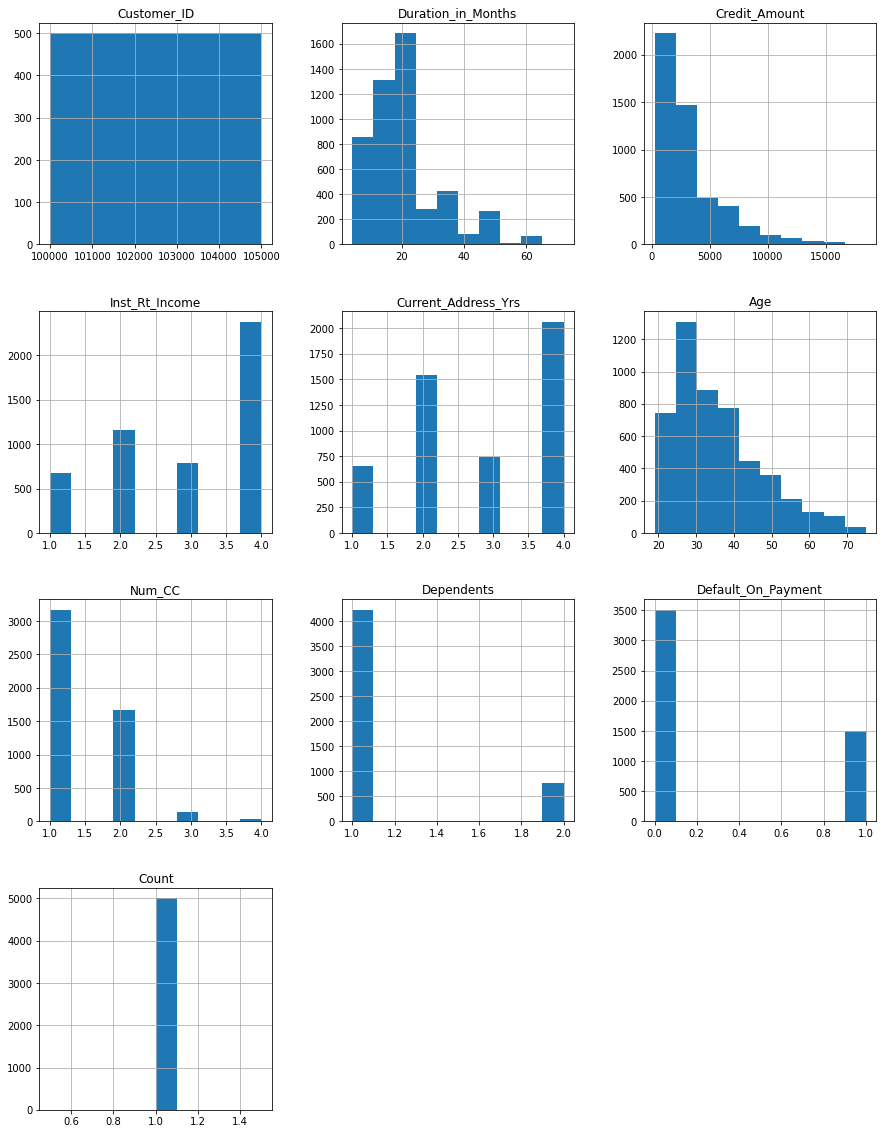

In [8]:
# first histgram plot for each columns
data1.hist(figsize = (15,20));

In [28]:
# calculate the Information value

#### Information value (IV) % Weight of Evidence (WOE) 

#### IV and WOE are powerful techniques to perform variable transformation and selection. It is widely used in credit scoring to measure the separation of good vs bad customers.

- Handles missing values
- handles outliers
- The transformation is based on logarithmic value of distributions. This is works well with the logistic regression output function
- No need for dummy variables
- By using proper binning technique, it can establish monotonic relationship (either increase or decrease) between the indpendent and dependent variable.

In [29]:
def iv_woe(data, target, bins=10, show_woe=False):
    
    #Empty Dataframe
    newDF,woeDF = pd.DataFrame(), pd.DataFrame()
    
    #Extract Column Names
    cols = data.columns
    
    #Run WOE and IV on all the independent variables
    for ivars in cols[~cols.isin([target])]:
        if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars]))>10):
            binned_x = pd.qcut(data[ivars], bins,  duplicates='drop')
            d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})
        else:
            d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})
        d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']
        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()
        d['Non-Events'] = d['N'] - d['Events']
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()
        d['WoE'] = np.log(d['% of Events']/d['% of Non-Events'])
        d['IV'] = d['WoE'] * (d['% of Events'] - d['% of Non-Events'])
        d.insert(loc=0, column='Variable', value=ivars)
        print("Information value of " + ivars + " is " + str(round(d['IV'].sum(),6)))
        temp =pd.DataFrame({"Variable" : [ivars], "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
        newDF=pd.concat([newDF,temp], axis=0)
        woeDF=pd.concat([woeDF,d], axis=0)

        #Show WOE Table
        if show_woe == True:
            print(d)
    return newDF, woeDF

In [33]:
iv, woe = iv_woe(data = data1, target = 'Default_On_Payment', bins = 10, show_woe = True)
# print(iv)
# print(woe)
iv = pd.DataFrame(iv)

Information value of Customer_ID is 0.019189
      Variable                  Cutoff    N  Events  % of Events  Non-Events  \
0  Customer_ID  (100000.999, 100500.9]  500     135     0.090301         365   
1  Customer_ID    (100500.9, 101000.8]  500     164     0.109699         336   
2  Customer_ID    (101000.8, 101500.7]  500     135     0.090301         365   
3  Customer_ID    (101500.7, 102000.6]  500     164     0.109699         336   
4  Customer_ID    (102000.6, 102500.5]  500     135     0.090301         365   
5  Customer_ID    (102500.5, 103000.4]  500     164     0.109699         336   
6  Customer_ID    (103000.4, 103500.3]  500     135     0.090301         365   
7  Customer_ID    (103500.3, 104000.2]  500     164     0.109699         336   
8  Customer_ID    (104000.2, 104500.1]  500     135     0.090301         365   
9  Customer_ID    (104500.1, 105000.0]  500     164     0.109699         336   

   % of Non-Events       WoE        IV  
0         0.104137 -0.142558  0.0

In [37]:
iv.sort_values(['IV'], ascending = False)

,Variable,IV
0,Status_Checking_Acc,0.662863
0,Credit_History,0.292735
0,Duration_in_Months,0.238469
0,Savings_Acc,0.193633
0,Purposre_Credit_Taken,0.173556
0,Property,0.117523
0,Credit_Amount,0.110607
0,Age,0.096782
0,Years_At_Present_Employment,0.086258
0,Housing,0.085287


### Filtering the data by following:
- iv < 0.02       useless for preduction
- 0.02 ~ 0.1      weak predictor
- 0.1 ~ 0.3       medium predictor
- 0.3 ~ 0.5       strong predictor
- 0.5 +           Suspicious or too good

In [42]:
pred_col = iv.loc[iv['IV'] >= 0.02]
pred_col = pred_col['Variable'].to_list()
pred_col

['Status_Checking_Acc',
 'Duration_in_Months',
 'Credit_History',
 'Purposre_Credit_Taken',
 'Credit_Amount',
 'Savings_Acc',
 'Years_At_Present_Employment',
 'Inst_Rt_Income',
 'Marital_Status_Gender',
 'Other_Debtors_Guarantors',
 'Property',
 'Age',
 'Other_Inst_Plans ',
 'Housing',
 'Foreign_Worker']

In [44]:
data2 = data1.loc[:, [i for i in pred_col]]
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Status_Checking_Acc          5000 non-null   object
 1   Duration_in_Months           5000 non-null   int64 
 2   Credit_History               5000 non-null   object
 3   Purposre_Credit_Taken        5000 non-null   object
 4   Credit_Amount                5000 non-null   int64 
 5   Savings_Acc                  5000 non-null   object
 6   Years_At_Present_Employment  5000 non-null   object
 7   Inst_Rt_Income               5000 non-null   int64 
 8   Marital_Status_Gender        5000 non-null   object
 9   Other_Debtors_Guarantors     5000 non-null   object
 10  Property                     5000 non-null   object
 11  Age                          5000 non-null   int64 
 12  Other_Inst_Plans             5000 non-null   object
 13  Housing                      5000

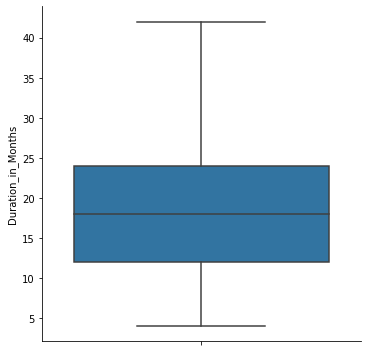

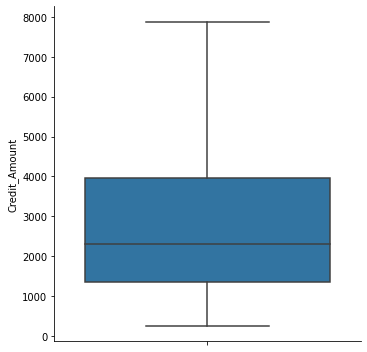

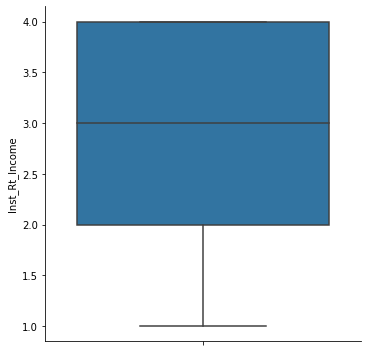

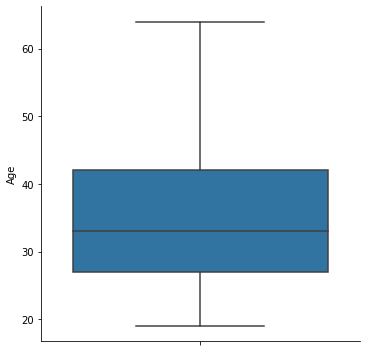

In [46]:
# check outliers for numerical data
import matplotlib.pyplot as plt

for i in data2.columns.to_list():
    if data2[i].dtype != 'object':
        sns.catplot(y = i, data = data2, kind = 'box', sym = '')
        plt.show()
    else:
        pass

In [51]:
# get the categorical data column names
my_cat_columns = []
for i in data2.columns.to_list():
    if data1[i].dtype == 'object':
        my_cat_columns.append(i)
    else:
        pass
my_cat_columns

['Status_Checking_Acc',
 'Credit_History',
 'Purposre_Credit_Taken',
 'Savings_Acc',
 'Years_At_Present_Employment',
 'Marital_Status_Gender',
 'Other_Debtors_Guarantors',
 'Property',
 'Other_Inst_Plans ',
 'Housing',
 'Foreign_Worker']

In [55]:
cat = data2.loc[:, [i for i in my_cat_columns]]
cat
dum = pd.get_dummies(cat.astype(str), drop_first = True)

data2 = pd.concat([data2, dum], axis = 1)
data2 = data2.drop(columns = [i for i in my_cat_columns])
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 78 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   Duration_in_Months               5000 non-null   int64
 1   Credit_Amount                    5000 non-null   int64
 2   Inst_Rt_Income                   5000 non-null   int64
 3   Age                              5000 non-null   int64
 4   Status_Checking_Acc_A12          5000 non-null   uint8
 5   Status_Checking_Acc_A13          5000 non-null   uint8
 6   Status_Checking_Acc_A14          5000 non-null   uint8
 7   Credit_History_A31               5000 non-null   uint8
 8   Credit_History_A32               5000 non-null   uint8
 9   Credit_History_A33               5000 non-null   uint8
 10  Credit_History_A34               5000 non-null   uint8
 11  Purposre_Credit_Taken_A41        5000 non-null   uint8
 12  Purposre_Credit_Taken_A410       5000 non-null  

In [65]:
y = data1['Default_On_Payment'].values
X = data2

In [75]:
# Scaling all the variables to a range of 0 to 1

from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 14)

In [89]:
# using SMOTE to oversampling due to imbalanced data
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 33)
X_balance, y_balance = sm.fit_resample(X_train.values, y_train)
pd.DataFrame(y_balance).value_counts()

0    2804
1    2804
dtype: int64

In [90]:
from sklearn import metrics
model = LogisticRegression()
LG = model.fit(X_balance, y_balance)

pred_y = model.predict(X_test)
print(metrics.confusion_matrix(y_test, pred_y))
print(metrics.accuracy_score(y_test, pred_y))


[[516 185]
 [ 63 236]]
0.752


In [91]:
print(metrics.classification_report(y_test, pred_y))

              precision    recall  f1-score   support

           0       0.89      0.74      0.81       701
           1       0.56      0.79      0.66       299

    accuracy                           0.75      1000
   macro avg       0.73      0.76      0.73      1000
weighted avg       0.79      0.75      0.76      1000



### the accuracy for logistic regression is 75.2%
### the Recall is (what positive we got right) / (all actual positives) 
### the precision is (what positive we got right) / (all positive prediction)